Pneumonia Detection using Deep Learning Ensemble

Resuming download from 700448768 bytes (1762916667 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/paultimothymooney/chest-xray-pneumonia?dataset_version_number=2 (700448768/2463365435) bytes left.


100%|██████████| 2.29G/2.29G [18:53<00:00, 1.56MB/s] 

Extracting files...



Loading and preprocessing data...

Loading dataset...
Loaded 100/1000 NORMAL images
Loaded 200/1000 NORMAL images
Loaded 300/1000 NORMAL images
Loaded 400/1000 NORMAL images
Loaded 500/1000 NORMAL images
Loaded 600/1000 NORMAL images
Loaded 700/1000 NORMAL images
Loaded 800/1000 NORMAL images
Loaded 900/1000 NORMAL images
Loaded 1000/1000 NORMAL images
Loaded 100/1000 PNEUMONIA images
Loaded 200/1000 PNEUMONIA images
Loaded 300/1000 PNEUMONIA images
Loaded 400/1000 PNEUMONIA images
Loaded 500/1000 PNEUMONIA images
Loaded 600/1000 PNEUMONIA images
Loaded 700/1000 PNEUMONIA images
Loaded 800/1000 PNEUMONIA images
Loaded 900/1000 PNEUMONIA images
Loaded 1000/1000 PNEUMONIA images

Dataset Statistics:
Total images: 2000
Normal: 1000, Pneumonia: 1000
Image shape: (224, 224, 3)
Pixel range: [0.000, 255.000]

Initializing models...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 68s 1us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 39s 1us/step

Ensemble

Model: "pneumonia_ensemble"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ensemble_input_res… │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ensemble_input_mob… │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ensemble_input_den… │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ ensemble_input_r… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_2… │ (None, 7, 7,      │  2,257,984 │ ensemble_input_m… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet169         │ (None, 7, 7,      │ 12,642,880 │ ensemble_input_d… │
│ (Functional)        │ 1664)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ens_gap_resnet      │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ens_gap_mobilenet   │ (None, 1280)      │          0 │ mobilenetv2_1.00… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ens_gap_densenet    │ (None, 1664)      │          0 │ densenet169[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_ensemb… │ (None, 4992)      │          0 │ ens_gap_resnet[0… │
│ (Concatenate)       │                   │            │ ens_gap_mobilene… │
│                     │                   │            │ ens_gap_densenet… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_512_ens       │ (None, 512)       │  2,556,416 │ concatenate_ense… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_512_ens          │ (None, 512)       │      2,048 │ dense_512_ens[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_512_ens     │ (None, 512)       │          0 │ bn_512_ens[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_256_ens       │ (None, 256)       │    131,328 │ dropout_512_ens[… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_256_ens          │ (None, 256)       │      1,024 │ dense_256_ens[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_256_ens     │ (None, 256)       │          0 │ bn_256_ens[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 41,213,058 (157.22 MB)

 Trainable params: 40,965,634 (156.27 MB)

 Non-trainable params: 247,424 (966.50 KB)


Training models...

Training ResNet50...
Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 494s 9s/step - accuracy: 0.8076 - loss: 0.4470 - val_accuracy: 0.9575 - val_loss: 0.1484 - learning_rate: 1.0000e-04
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 521s 10s/step - accuracy: 0.9726 - loss: 0.0714 - val_accuracy: 0.9700 - val_loss: 0.0940 - learning_rate: 1.0000e-04
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2437s 50s/step - accuracy: 0.9850 - loss: 0.0350 - val_accuracy: 0.9675 - val_loss: 0.0873 - learning_rate: 1.0000e-04
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 480s 10s/step - accuracy: 0.9918 - loss: 0.0275 - val_accuracy: 0.9650 - val_loss: 0.1017 - learning_rate: 1.0000e-04
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 503s 10s/step - accuracy: 0.9971 - loss: 0.0178 - val_accuracy: 0.9675 - val_loss: 0.0972 - learning_rate: 1.0000e-04
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 465s 9s/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9525 - val_loss: 0.1063 - learning_rate: 1.0000e-04
Epoch 7/30
50/50 ━━━━━━

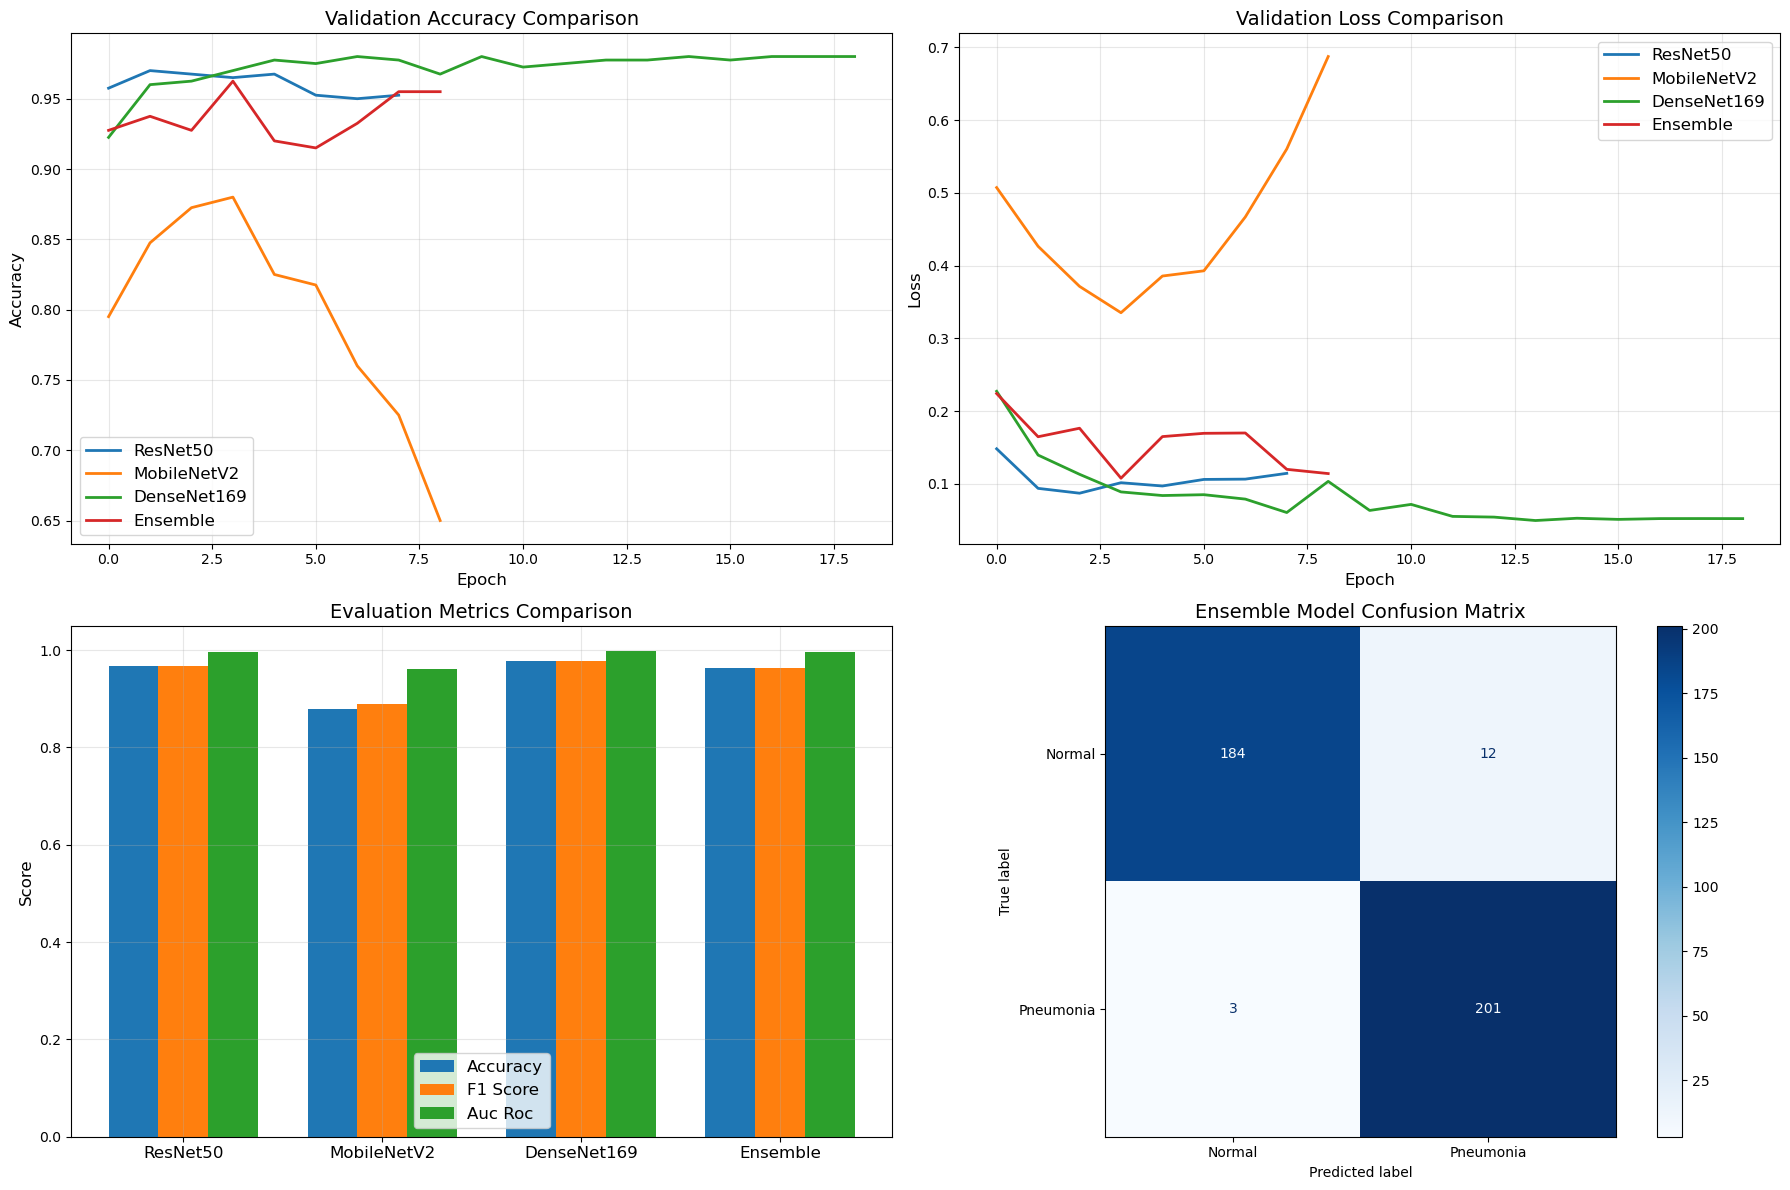

In [1]:
import numpy as np
from pathlib import Path
import kagglehub
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet169, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

class PneumoniaEnsemble:
    def __init__(self, input_shape=(224, 224, 3)):
        np.random.seed(42)
        self.input_shape = input_shape

        # Create individual models first
        self.resnet_model = self.build_individual_model('resnet')
        self.mobilenet_model = self.build_individual_model('mobilenet')
        self.densenet_model = self.build_individual_model('densenet')

        # Build ensemble model with separate inputs
        self.ensemble_model = self.build_ensemble_model()
        
        print("\nEnsemble Model Architecture:")
        self.ensemble_model.summary()

    def build_individual_model(self, model_name):
        """Build individual model with unique layer names"""
        inputs = tf.keras.Input(shape=self.input_shape, name=f'input_{model_name}')
        
        # Create base model with unique names
        if model_name == 'resnet':
            base_model = ResNet50(weights='imagenet', include_top=False, input_shape=self.input_shape)
        elif model_name == 'mobilenet':
            base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=self.input_shape)
        elif model_name == 'densenet':
            base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=self.input_shape)
        
        # Rename base model layers to avoid conflicts
        for i, layer in enumerate(base_model.layers):
            layer._name = f'{model_name}_{layer.name}_{i}'
        
        x = base_model(inputs)
        x = GlobalAveragePooling2D(name=f'gap_{model_name}')(x)
        x = Dense(256, activation='relu', name=f'dense_256_{model_name}')(x)
        x = BatchNormalization(name=f'bn_256_{model_name}')(x)
        x = Dropout(0.4, name=f'dropout_256_{model_name}')(x)
        x = Dense(128, activation='relu', name=f'dense_128_{model_name}')(x)
        x = BatchNormalization(name=f'bn_128_{model_name}')(x)
        x = Dropout(0.3, name=f'dropout_128_{model_name}')(x)
        outputs = Dense(2, activation='softmax', name=f'output_{model_name}')(x)
        
        model = Model(inputs=inputs, outputs=outputs, name=f'model_{model_name}')
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
        )
        return model

    def create_feature_extractor(self, model, model_name):
        """Create feature extractor from trained model"""
        # Get the layer before the final classification layers
        feature_layer = model.get_layer(f'gap_{model_name}')
        feature_extractor = Model(inputs=model.input, outputs=feature_layer.output, name=f'fe_{model_name}')
        return feature_extractor

    def build_ensemble_model(self):
        """Build ensemble model using separate inputs"""
        # Create three separate inputs for the ensemble
        input_resnet = tf.keras.Input(shape=self.input_shape, name='ensemble_input_resnet')
        input_mobilenet = tf.keras.Input(shape=self.input_shape, name='ensemble_input_mobilenet')
        input_densenet = tf.keras.Input(shape=self.input_shape, name='ensemble_input_densenet')
        
        # Create new base models for ensemble (with different names)
        base_resnet_ens = ResNet50(weights='imagenet', include_top=False, input_shape=self.input_shape)
        base_mobilenet_ens = MobileNetV2(weights='imagenet', include_top=False, input_shape=self.input_shape)
        base_densenet_ens = DenseNet169(weights='imagenet', include_top=False, input_shape=self.input_shape)
        
        # Rename layers for ensemble models
        for i, layer in enumerate(base_resnet_ens.layers):
            layer._name = f'ens_resnet_{layer.name}_{i}'
        for i, layer in enumerate(base_mobilenet_ens.layers):
            layer._name = f'ens_mobilenet_{layer.name}_{i}'
        for i, layer in enumerate(base_densenet_ens.layers):
            layer._name = f'ens_densenet_{layer.name}_{i}'
        
        # Extract features
        features_resnet = GlobalAveragePooling2D(name='ens_gap_resnet')(base_resnet_ens(input_resnet))
        features_mobilenet = GlobalAveragePooling2D(name='ens_gap_mobilenet')(base_mobilenet_ens(input_mobilenet))
        features_densenet = GlobalAveragePooling2D(name='ens_gap_densenet')(base_densenet_ens(input_densenet))
        
        # Combine features
        combined = Concatenate(name='concatenate_ensemble')([features_resnet, features_mobilenet, features_densenet])
        
        # Add ensemble-specific layers
        x = Dense(512, activation='relu', name='dense_512_ens')(combined)
        x = BatchNormalization(name='bn_512_ens')(x)
        x = Dropout(0.5, name='dropout_512_ens')(x)
        x = Dense(256, activation='relu', name='dense_256_ens')(x)
        x = BatchNormalization(name='bn_256_ens')(x)
        x = Dropout(0.4, name='dropout_256_ens')(x)
        x = Dense(128, activation='relu', name='dense_128_ens')(x)
        x = BatchNormalization(name='bn_128_ens')(x)
        x = Dropout(0.3, name='dropout_128_ens')(x)
        output = Dense(2, activation='softmax', name='output_ens')(x)
        
        ensemble_model = Model(
            inputs=[input_resnet, input_mobilenet, input_densenet], 
            outputs=output,
            name='pneumonia_ensemble'
        )
        
        ensemble_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
        )
        return ensemble_model

    def preprocess_input(self, X):
        """Model-specific preprocessing"""
        X = X.astype('float32')
        
        # ResNet and DenseNet use the same preprocessing
        X_resnet_densenet = tf.keras.applications.resnet50.preprocess_input(X.copy())
        
        # MobileNetV2 uses different preprocessing
        X_mobilenet = tf.keras.applications.mobilenet_v2.preprocess_input(X.copy())
        
        return [X_resnet_densenet, X_mobilenet, X_resnet_densenet]

    def train(self, X_train, y_train, X_val, y_val, epochs=30, batch_size=32):
        """Train all models"""
        X_train_processed = self.preprocess_input(X_train)
        X_val_processed = self.preprocess_input(X_val)

        # Common callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
        )

        # Train individual models
        print("\nTraining ResNet50...")
        resnet_history = self.resnet_model.fit(
            X_train_processed[0], y_train,
            validation_data=(X_val_processed[0], y_val),
            epochs=epochs, batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        print("\nTraining MobileNetV2...")
        mobilenet_history = self.mobilenet_model.fit(
            X_train_processed[1], y_train,
            validation_data=(X_val_processed[1], y_val),
            epochs=epochs, batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        print("\nTraining DenseNet169...")
        densenet_history = self.densenet_model.fit(
            X_train_processed[2], y_train,
            validation_data=(X_val_processed[2], y_val),
            epochs=epochs, batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        print("\nTraining Ensemble Model...")
        ensemble_history = self.ensemble_model.fit(
            X_train_processed, y_train,
            validation_data=(X_val_processed, y_val),
            epochs=epochs, batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        return {
            'ResNet50': resnet_history.history,
            'MobileNetV2': mobilenet_history.history,
            'DenseNet169': densenet_history.history,
            'Ensemble': ensemble_history.history
        }

    def evaluate(self, X_test, y_test):
        """Evaluate all models"""
        X_test_processed = self.preprocess_input(X_test)
        models = {
            'ResNet50': (self.resnet_model, 0),
            'MobileNetV2': (self.mobilenet_model, 1),
            'DenseNet169': (self.densenet_model, 2),
            'Ensemble': (self.ensemble_model, None)
        }
        results = {}

        for name, (model, idx) in models.items():
            print(f"\nEvaluating {name}...")
            input_data = X_test_processed if name == 'Ensemble' else X_test_processed[idx]
            
            y_pred = np.argmax(model.predict(input_data, verbose=0), axis=1)
            y_pred_proba = model.predict(input_data, verbose=0)[:, 1]
            
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred_proba)
            
            results[name] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'auc_roc': auc,
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }
        
        return results

def load_dataset(data_dir, target_size=(224, 224), max_per_class=1000, split_ratio=0.8):
    """Load and preprocess dataset"""
    data_dir = Path(data_dir)
    train_dir = data_dir / 'train'
    classes = ['NORMAL', 'PNEUMONIA']
    X, y = [], []

    print("\nLoading dataset...")
    for cls_idx, cls in enumerate(classes):
        cls_dir = train_dir / cls
        if not cls_dir.exists():
            print(f"Directory {cls_dir} not found!")
            continue

        count = 0
        image_files = list(cls_dir.glob('*.jpeg')) + list(cls_dir.glob('*.jpg'))
        np.random.shuffle(image_files)

        for img_path in image_files:
            if count >= max_per_class:
                break
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size, Image.Resampling.LANCZOS)
                img_array = np.array(img, dtype=np.float32)
                X.append(img_array)
                y.append(cls_idx)
                count += 1

                if count % 100 == 0:
                    print(f"Loaded {count}/{max_per_class} {cls} images")

            except Exception as e:
                print(f"Error loading {img_path}: {e}")
                continue

    X = np.array(X)
    y = np.array(y)

    print("\nDataset Statistics:")
    print(f"Total images: {len(X)}")
    print(f"Normal: {np.sum(y == 0)}, Pneumonia: {np.sum(y == 1)}")
    print(f"Image shape: {X.shape[1:]}")
    print(f"Pixel range: [{X.min():.3f}, {X.max():.3f}]")

    # Shuffle data
    indices = np.random.permutation(len(X))
    X, y = X[indices], y[indices]

    # Split data
    n_train = int(len(X) * split_ratio)
    X_train, X_val = X[:n_train], X[n_train:]
    y_train, y_val = y[:n_train], y[n_train:]

    return X_train, y_train, X_val, y_val

def plot_results(histories, evaluation_results, y_val):
    """Visualize training and evaluation results"""
    plt.figure(figsize=(18, 12))

    # Plot 1: Validation Accuracy
    plt.subplot(2, 2, 1)
    for name, history in histories.items():
        plt.plot(history['val_accuracy'], label=name, linewidth=2)
    plt.title('Validation Accuracy Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 2: Validation Loss
    plt.subplot(2, 2, 2)
    for name, history in histories.items():
        plt.plot(history['val_loss'], label=name, linewidth=2)
    plt.title('Validation Loss Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 3: Bar Plot for Evaluation Metrics
    metrics = ['accuracy', 'f1_score', 'auc_roc']
    model_names = list(evaluation_results.keys())
    x = np.arange(len(model_names))
    width = 0.25

    plt.subplot(2, 2, 3)
    for i, metric in enumerate(metrics):
        values = [evaluation_results[name][metric] for name in model_names]
        plt.bar(x + i * width, values, width, label=metric.replace('_', ' ').title())
    
    plt.xticks(x + width, model_names, fontsize=12)
    plt.title('Evaluation Metrics Comparison', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 4: Confusion Matrix for Ensemble
    plt.subplot(2, 2, 4)
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    ensemble_preds = evaluation_results['Ensemble']['predictions']
    cm = confusion_matrix(y_val, ensemble_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title('Ensemble Model Confusion Matrix', fontsize=14)

    plt.tight_layout()
    plt.show()

def main():
    print("Pneumonia Detection using Deep Learning Ensemble")
    print("=" * 60)

    # Download dataset
    try:
        print("\nDownloading dataset...")
        dataset_path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
        data_dir = Path(dataset_path) / "chest_xray"

        if not data_dir.exists():
            for item in Path(dataset_path).iterdir():
                if item.is_dir() and 'chest' in item.name.lower():
                    data_dir = item
                    break
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        print("Using local dataset path instead...")
        data_dir = Path("chest_xray")

    # Load dataset
    print("\nLoading and preprocessing data...")
    X_train, y_train, X_val, y_val = load_dataset(
        data_dir, 
        target_size=(224, 224), 
        max_per_class=1000,
        split_ratio=0.8
    )

    # Create and train model ensemble
    print("\nInitializing models...")
    model = PneumoniaEnsemble(input_shape=(224, 224, 3))
    
    print("\nTraining models...")
    histories = model.train(
        X_train, y_train, 
        X_val, y_val, 
        epochs=30, 
        batch_size=32
    )

    # Evaluate and compare models
    print("\nEvaluating models...")
    evaluation_results = model.evaluate(X_val, y_val)
    
    print("\nEvaluation Results:")
    for name, metrics in evaluation_results.items():
        print(f"\n{name}:")
        print(f"  Accuracy: {metrics['accuracy']:.4f}")
        print(f"  F1-Score: {metrics['f1_score']:.4f}")
        print(f"  AUC-ROC: {metrics['auc_roc']:.4f}")

    # Plot results
    print("\nGenerating plots...")
    plot_results(histories, evaluation_results, y_val)

if __name__ == "__main__":
    main()

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from pathlib import Path
import kagglehub
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet169, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class PneumoniaStackingEnsemble:
    def __init__(self, input_shape=(224, 224, 3)):
        np.random.seed(42)
        self.input_shape = input_shape

        # Create individual models
        self.resnet_model = self.build_individual_model('resnet')
        self.mobilenet_model = self.build_individual_model('mobilenet')
        self.densenet_model = self.build_individual_model('densenet')

        # Placeholder for meta-learner
        self.meta_learner = None

        print("\nIndividual Models Initialized")

    def build_individual_model(self, model_name):
        """Build individual model with unique layer names"""
        inputs = tf.keras.Input(shape=self.input_shape, name=f'input_{model_name}')
        
        if model_name == 'resnet':
            base_model = ResNet50(weights='imagenet', include_top=False, input_shape=self.input_shape)
        elif model_name == 'mobilenet':
            base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=self.input_shape)
        elif model_name == 'densenet':
            base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=self.input_shape)
        
        for i, layer in enumerate(base_model.layers):
            layer._name = f'{model_name}_{layer.name}_{i}'
        
        x = base_model(inputs)
        x = GlobalAveragePooling2D(name=f'gap_{model_name}')(x)
        x = Dense(256, activation='relu', name=f'dense_256_{model_name}')(x)
        x = BatchNormalization(name=f'bn_256_{model_name}')(x)
        x = Dropout(0.4, name=f'dropout_256_{model_name}')(x)
        x = Dense(128, activation='relu', name=f'dense_128_{model_name}')(x)
        x = BatchNormalization(name=f'bn_128_{model_name}')(x)
        x = Dropout(0.3, name=f'dropout_128_{model_name}')(x)
        outputs = Dense(2, activation='softmax', name=f'output_{model_name}')(x)
        
        model = Model(inputs=inputs, outputs=outputs, name=f'model_{model_name}')
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def build_meta_learner(self):
        """Build a simple neural network as meta-learner"""
        inputs = Input(shape=(6,))  # 3 models x 2 classes (softmax outputs)
        x = Dense(32, activation='relu')(inputs)
        x = Dropout(0.3)(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(2, activation='softmax')(x)
        
        meta_learner = Model(inputs=inputs, outputs=outputs, name='meta_learner')
        meta_learner.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return meta_learner

    def preprocess_input(self, X):
        """Model-specific preprocessing"""
        X = X.astype('float32')
        X_resnet_densenet = tf.keras.applications.resnet50.preprocess_input(X.copy())
        X_mobilenet = tf.keras.applications.mobilenet_v2.preprocess_input(X.copy())
        return [X_resnet_densenet, X_mobilenet, X_resnet_densenet]

    def get_data_augmentation(self):
        """Define data augmentation pipeline"""
        return ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def train_base_models(self, X_train, y_train, X_val, y_val, epochs=30, batch_size=32, k_folds=5):
        """Train base models using k-fold cross-validation"""
        X_train_processed = self.preprocess_input(X_train)
        X_val_processed = self.preprocess_input(X_val)
        histories = {'ResNet50': [], 'MobileNetV2': [], 'DenseNet169': []}

        # Callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
        )

        # Data augmentation
        datagen = self.get_data_augmentation()

        # K-fold cross-validation
        kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            print(f"\nFold {fold + 1}/{k_folds}")
            X_train_fold = [X[train_idx] for X in X_train_processed]
            y_train_fold = y_train[train_idx]
            X_val_fold = [X[val_idx] for X in X_train_processed]
            y_val_fold = y_train[val_idx]

            # Train ResNet50
            print(f"Training ResNet50 Fold {fold + 1}...")
            resnet_history = self.resnet_model.fit(
                datagen.flow(X_train_fold[0], y_train_fold, batch_size=batch_size),
                validation_data=(X_val_fold[0], y_val_fold),
                epochs=epochs,
                callbacks=[early_stopping, reduce_lr],
                verbose=1
            )
            histories['ResNet50'].append(resnet_history.history)

            # Train MobileNetV2
            print(f"Training MobileNetV2 Fold {fold + 1}...")
            mobilenet_history = self.mobilenet_model.fit(
                datagen.flow(X_train_fold[1], y_train_fold, batch_size=batch_size),
                validation_data=(X_val_fold[1], y_val_fold),
                epochs=epochs,
                callbacks=[early_stopping, reduce_lr],
                verbose=1
            )
            histories['MobileNetV2'].append(mobilenet_history.history)

            # Train DenseNet169
            print(f"Training DenseNet169 Fold {fold + 1}...")
            densenet_history = self.densenet_model.fit(
                datagen.flow(X_train_fold[2], y_train_fold, batch_size=batch_size),
                validation_data=(X_val_fold[2], y_val_fold),
                epochs=epochs,
                callbacks=[early_stopping, reduce_lr],
                verbose=1
            )
            histories['DenseNet169'].append(densenet_history.history)

        # Aggregate histories (average across folds)
        for model_name in histories:
            histories[model_name] = {
                key: np.mean([h[key] for h in histories[model_name]], axis=0)
                for key in histories[model_name][0]
            }

        return histories

    def generate_meta_features(self, X, y):
        """Generate meta-features (predictions) from base models"""
        X_processed = self.preprocess_input(X)
        meta_features = []

        # Get predictions from each base model
        resnet_preds = self.resnet_model.predict(X_processed[0], verbose=0)
        mobilenet_preds = self.mobilenet_model.predict(X_processed[1], verbose=0)
        densenet_preds = self.densenet_model.predict(X_processed[2], verbose=0)

        # Stack predictions as meta-features
        meta_features = np.hstack([resnet_preds, mobilenet_preds, densenet_preds])
        return meta_features, y

    def train_meta_learner(self, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
        """Train the meta-learner on base model predictions"""
        print("\nTraining Meta-Learner...")
        meta_train_features, meta_train_labels = self.generate_meta_features(X_train, y_train)
        meta_val_features, meta_val_labels = self.generate_meta_features(X_val, y_val)

        self.meta_learner = self.build_meta_learner()
        
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
        )

        history = self.meta_learner.fit(
            meta_train_features, meta_train_labels,
            validation_data=(meta_val_features, meta_val_labels),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        return {'MetaLearner': history.history}

    def evaluate(self, X_test, y_test):
        """Evaluate all models and the stacking ensemble"""
        X_test_processed = self.preprocess_input(X_test)
        models = {
            'ResNet50': (self.resnet_model, 0),
            'MobileNetV2': (self.mobilenet_model, 1),
            'DenseNet169': (self.densenet_model, 2)
        }
        results = {}

        for name, (model, idx) in models.items():
            print(f"\nEvaluating {name}...")
            y_pred = np.argmax(model.predict(X_test_processed[idx], verbose=0), axis=1)
            y_pred_proba = model.predict(X_test_processed[idx], verbose=0)[:, 1]
            
            results[name] = {
                'accuracy': accuracy_score(y_test, y_pred),
                'f1_score': f1_score(y_test, y_pred),
                'auc_roc': roc_auc_score(y_test, y_pred_proba),
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }

        # Evaluate stacking ensemble
        print("\nEvaluating Stacking Ensemble...")
        meta_features, _ = self.generate_meta_features(X_test, y_test)
        y_pred = np.argmax(self.meta_learner.predict(meta_features, verbose=0), axis=1)
        y_pred_proba = self.meta_learner.predict(meta_features, verbose=0)[:, 1]
        
        results['StackingEnsemble'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'auc_roc': roc_auc_score(y_test, y_pred_proba),
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }

        return results

def load_dataset(data_dir, target_size=(224, 224), max_per_class=1000, split_ratio=0.8):
    """Load and preprocess dataset (unchanged from original)"""
    data_dir = Path(data_dir)
    train_dir = data_dir / 'train'
    classes = ['NORMAL', 'PNEUMONIA']
    X, y = [], []

    print("\nLoading dataset...")
    for cls_idx, cls in enumerate(classes):
        cls_dir = train_dir / cls
        if not cls_dir.exists():
            print(f"Directory {cls_dir} not found!")
            continue

        count = 0
        image_files = list(cls_dir.glob('*.jpeg')) + list(cls_dir.glob('*.jpg'))
        np.random.shuffle(image_files)

        for img_path in image_files:
            if count >= max_per_class:
                break
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size, Image.Resampling.LANCZOS)
                img_array = np.array(img, dtype=np.float32)
                X.append(img_array)
                y.append(cls_idx)
                count += 1

                if count % 100 == 0:
                    print(f"Loaded {count}/{max_per_class} {cls} images")

            except Exception as e:
                print(f"Error loading {img_path}: {e}")
                continue

    X = np.array(X)
    y = np.array(y)

    print("\nDataset Statistics:")
    print(f"Total images: {len(X)}")
    print(f"Normal: {np.sum(y == 0)}, Pneumonia: {np.sum(y == 1)}")
    print(f"Image shape: {X.shape[1:]}")
    print(f"Pixel range: [{X.min():.3f}, {X.max():.3f}]")

    indices = np.random.permutation(len(X))
    X, y = X[indices], y[indices]

    n_train = int(len(X) * split_ratio)
    X_train, X_val = X[:n_train], X[n_train:]
    y_train, y_val = y[:n_train], y[n_train:]

    return X_train, y_train, X_val, y_val

def plot_results(histories, evaluation_results, y_val):
    """Visualize training and evaluation results (modified for stacking)"""
    plt.figure(figsize=(18, 12))

    # Plot 1: Validation Accuracy
    plt.subplot(2, 2, 1)
    for name, history in histories.items():
        plt.plot(history['val_accuracy'], label=name, linewidth=2)
    plt.title('Validation Accuracy Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 2: Validation Loss
    plt.subplot(2, 2, 2)
    for name, history in histories.items():
        plt.plot(history['val_loss'], label=name, linewidth=2)
    plt.title('Validation Loss Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 3: Bar Plot for Evaluation Metrics
    metrics = ['accuracy', 'f1_score', 'auc_roc']
    model_names = list(evaluation_results.keys())
    x = np.arange(len(model_names))
    width = 0.25

    plt.subplot(2, 2, 3)
    for i, metric in enumerate(metrics):
        values = [evaluation_results[name][metric] for name in model_names]
        plt.bar(x + i * width, values, width, label=metric.replace('_', ' ').title())
    
    plt.xticks(x + width, model_names, fontsize=12)
    plt.title('Evaluation Metrics Comparison', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 4: Confusion Matrix for Stacking Ensemble
    plt.subplot(2, 2, 4)
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    ensemble_preds = evaluation_results['StackingEnsemble']['predictions']
    cm = confusion_matrix(y_val, ensemble_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title('Stacking Ensemble Confusion Matrix', fontsize=14)

    plt.tight_layout()
    plt.show()

def main():
    print("Pneumonia Detection using Stacking Ensemble")
    print("=" * 60)

    # Download dataset
    try:
        print("\nDownloading dataset...")
        dataset_path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
        data_dir = Path(dataset_path) / "chest_xray"

        if not data_dir.exists():
            for item in Path(dataset_path).iterdir():
                if item.is_dir() and 'chest' in item.name.lower():
                    data_dir = item
                    break
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        print("Using local dataset path instead...")
        data_dir = Path("chest_xray")

    # Load dataset
    print("\nLoading and preprocessing data...")
    X_train, y_train, X_val, y_val = load_dataset(
        data_dir,
        target_size=(224, 224),
        max_per_class=1000,
        split_ratio=0.8
    )

    # Create and train model ensemble
    print("\nInitializing models...")
    model = PneumoniaStackingEnsemble(input_shape=(224, 224, 3))
    
    print("\nTraining base models...")
    base_histories = model.train_base_models(
        X_train, y_train,
        X_val, y_val,
        epochs=30,
        batch_size=32,
        k_folds=5
    )

    print("\nTraining meta-learner...")
    meta_history = model.train_meta_learner(
        X_train, y_train,
        X_val, y_val,
        epochs=20,
        batch_size=32
    )

    # Combine histories
    histories = {**base_histories, **meta_history}

    # Evaluate and compare models
    print("\nEvaluating models...")
    evaluation_results = model.evaluate(X_val, y_val)
    
    print("\nEvaluation Results:")
    for name, metrics in evaluation_results.items():
        print(f"\n{name}:")
        print(f"  Accuracy: {metrics['accuracy']:.4f}")
        print(f"  F1-Score: {metrics['f1_score']:.4f}")
        print(f"  AUC-ROC: {metrics['auc_roc']:.4f}")

    # Plot results
    print("\nGenerating plots...")
    plot_results(histories, evaluation_results, y_val)

if __name__ == "__main__":
    main()

Pneumonia Detection using Stacking Ensemble


Loading and preprocessing data...

Loading dataset...
Loaded 100/1000 NORMAL images
Loaded 200/1000 NORMAL images
Loaded 300/1000 NORMAL images
Loaded 400/1000 NORMAL images
Loaded 500/1000 NORMAL images
Loaded 600/1000 NORMAL images
Loaded 700/1000 NORMAL images
Loaded 800/1000 NORMAL images
Loaded 900/1000 NORMAL images
Loaded 1000/1000 NORMAL images
Loaded 100/1000 PNEUMONIA images
Loaded 200/1000 PNEUMONIA images
Loaded 300/1000 PNEUMONIA images
Loaded 400/1000 PNEUMONIA images
Loaded 500/1000 PNEUMONIA images
Loaded 600/1000 PNEUMONIA images
Loaded 700/1000 PNEUMONIA images
Loaded 800/1000 PNEUMONIA images
Loaded 900/1000 PNEUMONIA images
Loaded 1000/1000 PNEUMONIA images

Dataset Statistics:
Total images: 2000
Normal: 1000, Pneumonia: 1000
Image shape: (224, 224, 3)
Pixel range: [0.000, 255.000]

Initializing models...

Individual Models Initialized

Training base models...

Fold 1/5
Training ResNet50 Fold 1...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 440s 10s/step - accuracy: 0.7602 - loss: 0.5728 - val_accuracy: 0.9438 - val_loss: 0.1640 - learning_rate: 1.0000e-04
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 382s 10s/step - accuracy: 0.9304 - loss: 0.1788 - val_accuracy: 0.9625 - val_loss: 0.0989 - learning_rate: 1.0000e-04
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 385s 10s/step - accuracy: 0.9542 - loss: 0.1327 - val_accuracy: 0.9750 - val_loss: 0.0862 - learning_rate: 1.0000e-04
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 399s 10s/step - accuracy: 0.9605 - loss: 0.1091 - val_accuracy: 0.9812 - val_loss: 0.0463 - learning_rate: 1.0000e-04
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1026s 26s/step - accuracy: 0.9718 - loss: 0.0924 - val_accuracy: 0.9688 - val_loss: 0.0815 - learning_rate: 1.0000e-04
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 389s 10s/step - accuracy: 0.9689 - loss: 0.0836 - val_accuracy: 0.9688 - val_loss: 0.0703 - learning_rate: 1.0000e-04
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2228s 57s/step - accuracy

KeyboardInterrupt: 

No GPU available, using CPU.
Pneumonia Detection using Stacking Ensemble


Loading and preprocessing data...

Loading dataset...
Loaded 100/1000 NORMAL images
Loaded 200/1000 NORMAL images
Loaded 300/1000 NORMAL images
Loaded 400/1000 NORMAL images
Loaded 500/1000 NORMAL images
Loaded 600/1000 NORMAL images
Loaded 700/1000 NORMAL images
Loaded 800/1000 NORMAL images
Loaded 900/1000 NORMAL images
Loaded 1000/1000 NORMAL images
Loaded 100/1000 PNEUMONIA images
Loaded 200/1000 PNEUMONIA images
Loaded 300/1000 PNEUMONIA images
Loaded 400/1000 PNEUMONIA images
Loaded 500/1000 PNEUMONIA images
Loaded 600/1000 PNEUMONIA images
Loaded 700/1000 PNEUMONIA images
Loaded 800/1000 PNEUMONIA images
Loaded 900/1000 PNEUMONIA images
Loaded 1000/1000 PNEUMONIA images

Dataset Statistics:
Total images: 2000
Normal: 1000, Pneumonia: 1000
Image shape: (224, 224, 3)
Pixel range: [0.000, 255.000]

Initializing models...

Individual Models Initialized

Training base models...
Training EfficientNetB0...


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 179s 6s/step - accuracy: 0.6366 - loss: 0.8156 - val_accuracy: 0.7525 - val_loss: 0.5593 - learning_rate: 1.0000e-04
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.9230 - loss: 0.1891 - val_accuracy: 0.8375 - val_loss: 0.4398 - learning_rate: 1.0000e-04
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 154s 6s/step - accuracy: 0.9445 - loss: 0.1442 - val_accuracy: 0.8575 - val_loss: 0.3710 - learning_rate: 1.0000e-04
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 158s 6s/step - accuracy: 0.9490 - loss: 0.1426 - val_accuracy: 0.8775 - val_loss: 0.3271 - learning_rate: 1.0000e-04
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 171s 7s/step - accuracy: 0.9633 - loss: 0.1014 - val_accuracy: 0.9175 - val_loss: 0.2686 - learning_rate: 1.0000e-04
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 175s 7s/step - accuracy: 0.9790 - loss: 0.0635 - val_accuracy: 0.9150 - val_loss: 0.2560 - learning_rate: 1.0000e-04
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 170s 7s/step - accuracy: 0.9784 

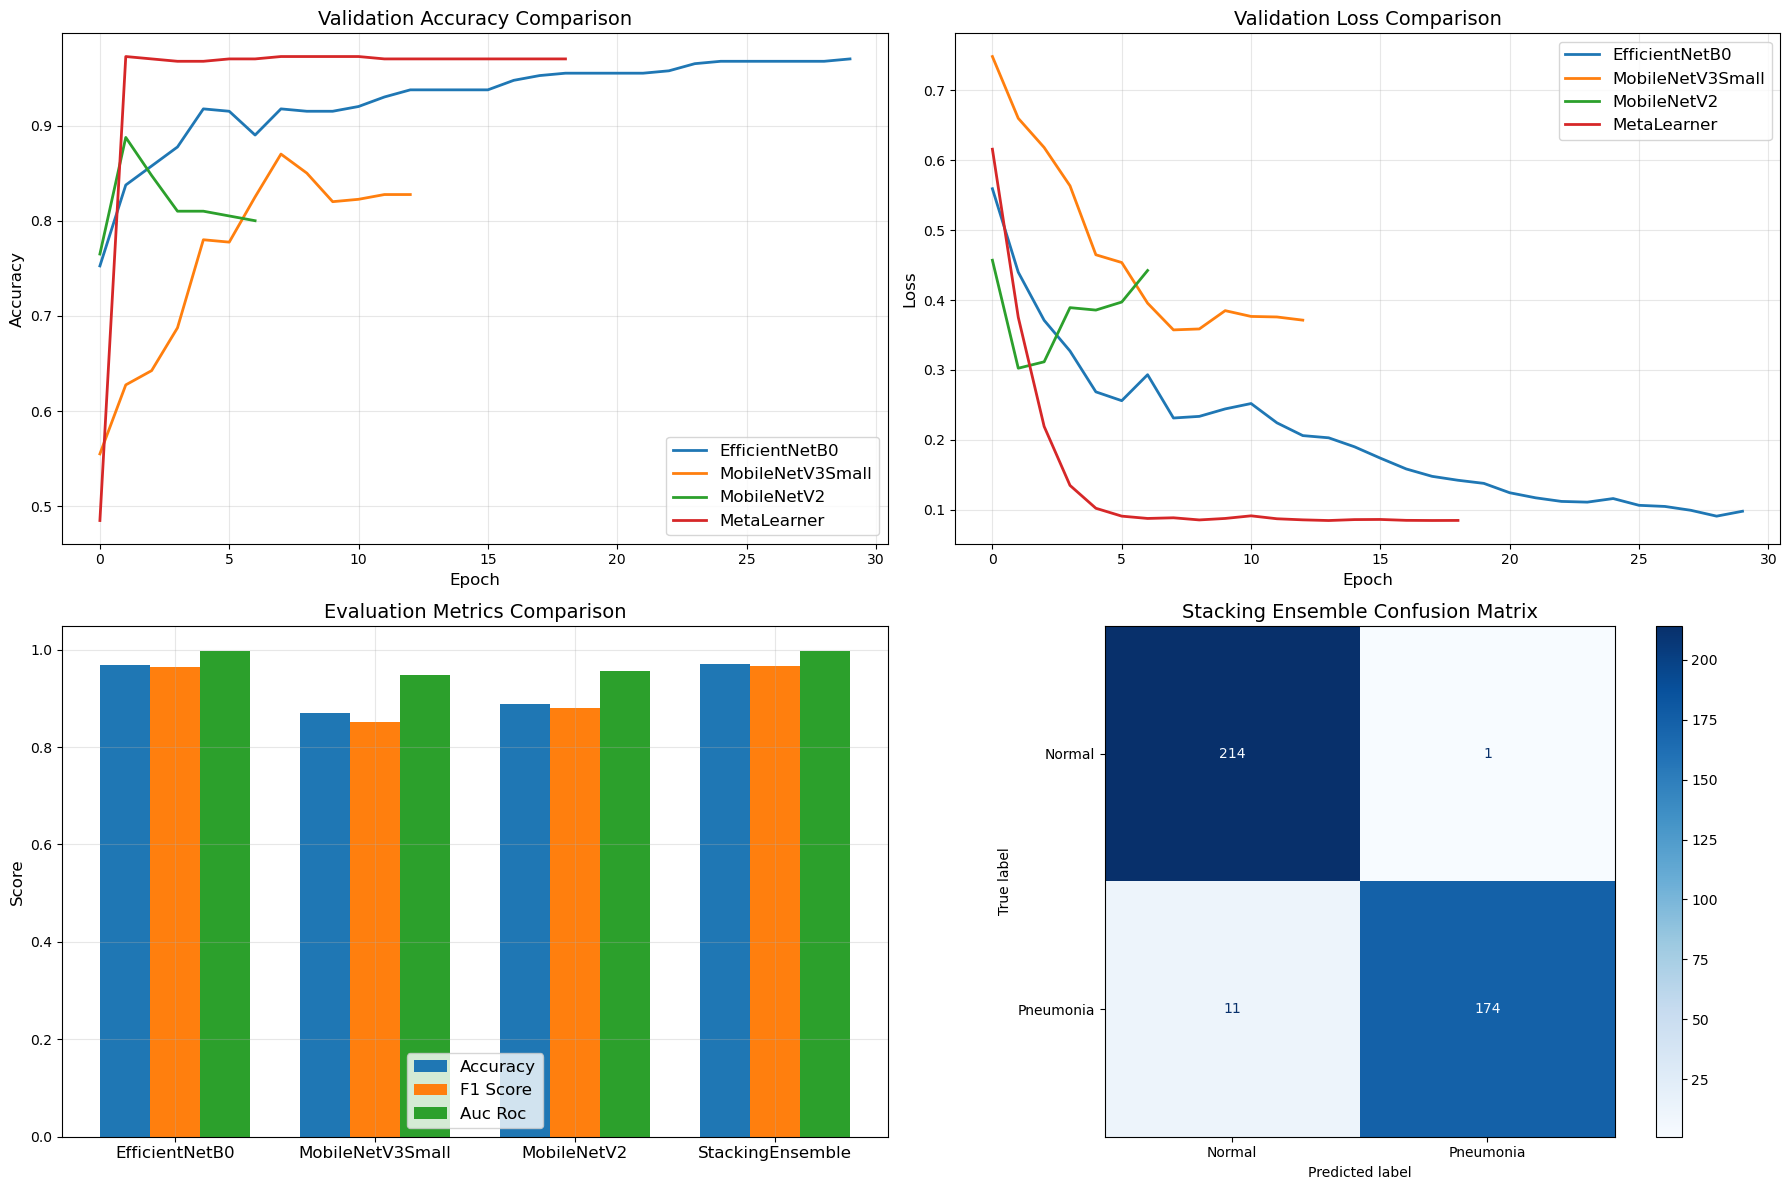

In [ ]:
import numpy as np
from pathlib import Path
import kagglehub
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, MobileNetV3Small, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.mixed_precision import set_global_policy, Policy

# Check GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(f"GPU is available: {physical_devices}")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available, using CPU.")

# Enable mixed precision training (optional, for better GPU performance)
set_global_policy(Policy('mixed_float16'))

class PneumoniaStackingEnsemble:
    def __init__(self, input_shape=(224, 224, 3)):
        np.random.seed(42)
        self.input_shape = input_shape

        # Create individual models
        self.efficientnet_model = self.build_individual_model('efficientnet')
        self.mobilenetv3_model = self.build_individual_model('mobilenetv3small')
        self.mobilenet_model = self.build_individual_model('mobilenet')

        # Placeholder for meta-learner
        self.meta_learner = None

        print("\nIndividual Models Initialized")

    def build_individual_model(self, model_name):
        """Build individual model with unique layer names"""
        inputs = tf.keras.Input(shape=self.input_shape, name=f'input_{model_name}')
        
        if model_name == 'efficientnet':
            base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=self.input_shape)
        elif model_name == 'mobilenetv3small':
            base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=self.input_shape, alpha=0.75)
        elif model_name == 'mobilenet':
            base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=self.input_shape, alpha=0.75)
        
        for i, layer in enumerate(base_model.layers):
            layer._name = f'{model_name}_{layer.name}_{i}'
        
        x = base_model(inputs)
        x = GlobalAveragePooling2D(name=f'gap_{model_name}')(x)
        x = Dense(128, activation='relu', name=f'dense_128_{model_name}')(x)
        x = BatchNormalization(name=f'bn_128_{model_name}')(x)
        x = Dropout(0.3, name=f'dropout_128_{model_name}')(x)
        outputs = Dense(2, activation='softmax', dtype='float32', name=f'output_{model_name}')(x)
        
        model = Model(inputs=inputs, outputs=outputs, name=f'model_{model_name}')
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def build_meta_learner(self):
        """Build a simple neural network as meta-learner"""
        inputs = Input(shape=(6,))  # 3 models x 2 classes (softmax outputs)
        x = Dense(32, activation='relu')(inputs)
        x = Dropout(0.3)(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(2, activation='softmax', dtype='float32')(x)
        
        meta_learner = Model(inputs=inputs, outputs=outputs, name='meta_learner')
        meta_learner.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return meta_learner

    def preprocess_input(self, X):
        """Model-specific preprocessing"""
        X = X.astype('float32')
        X_efficientnet = tf.keras.applications.efficientnet.preprocess_input(X.copy())
        X_mobilenetv3 = tf.keras.applications.mobilenet_v3.preprocess_input(X.copy())
        X_mobilenet = tf.keras.applications.mobilenet_v2.preprocess_input(X.copy())
        return [X_efficientnet, X_mobilenetv3, X_mobilenet]

    def get_data_augmentation(self):
        """Define data augmentation pipeline"""
        return ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def train_base_models(self, X_train, y_train, X_val, y_val, epochs=30, batch_size=64):
        """Train base models on full training data"""
        X_train_processed = self.preprocess_input(X_train)
        X_val_processed = self.preprocess_input(X_val)
        histories = {'EfficientNetB0': None, 'MobileNetV3Small': None, 'MobileNetV2': None}

        # Callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
        )

        # Data augmentation
        datagen = self.get_data_augmentation()

        # Train EfficientNetB0
        print("Training EfficientNetB0...")
        efficientnet_history = self.efficientnet_model.fit(
            datagen.flow(X_train_processed[0], y_train, batch_size=batch_size),
            validation_data=(X_val_processed[0], y_val),
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        histories['EfficientNetB0'] = efficientnet_history.history

        # Train MobileNetV3Small
        print("Training MobileNetV3Small...")
        mobilenetv3_history = self.mobilenetv3_model.fit(
            datagen.flow(X_train_processed[1], y_train, batch_size=batch_size),
            validation_data=(X_val_processed[1], y_val),
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        histories['MobileNetV3Small'] = mobilenetv3_history.history

        # Train MobileNetV2
        print("Training MobileNetV2...")
        mobilenet_history = self.mobilenet_model.fit(
            datagen.flow(X_train_processed[2], y_train, batch_size=batch_size),
            validation_data=(X_val_processed[2], y_val),
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        histories['MobileNetV2'] = mobilenet_history.history

        return histories

    def generate_meta_features(self, X, y):
        """Generate meta-features (predictions) from base models"""
        X_processed = self.preprocess_input(X)
        meta_features = []

        # Get predictions from each base model
        efficientnet_preds = self.efficientnet_model.predict(X_processed[0], verbose=0)
        mobilenetv3_preds = self.mobilenetv3_model.predict(X_processed[1], verbose=0)
        mobilenet_preds = self.mobilenet_model.predict(X_processed[2], verbose=0)

        # Stack predictions as meta-features
        meta_features = np.hstack([efficientnet_preds, mobilenetv3_preds, mobilenet_preds])
        return meta_features, y

    def train_meta_learner(self, X_train, y_train, X_val, y_val, epochs=20, batch_size=64):
        """Train the meta-learner on base model predictions"""
        print("\nTraining Meta-Learner...")
        meta_train_features, meta_train_labels = self.generate_meta_features(X_train, y_train)
        meta_val_features, meta_val_labels = self.generate_meta_features(X_val, y_val)

        self.meta_learner = self.build_meta_learner()
        
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
        )

        history = self.meta_learner.fit(
            meta_train_features, meta_train_labels,
            validation_data=(meta_val_features, meta_val_labels),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        return {'MetaLearner': history.history}

    def evaluate(self, X_test, y_test):
        """Evaluate all models and the stacking ensemble"""
        X_test_processed = self.preprocess_input(X_test)
        models = {
            'EfficientNetB0': (self.efficientnet_model, 0),
            'MobileNetV3Small': (self.mobilenetv3_model, 1),
            'MobileNetV2': (self.mobilenet_model, 2)
        }
        results = {}

        for name, (model, idx) in models.items():
            print(f"\nEvaluating {name}...")
            y_pred = np.argmax(model.predict(X_test_processed[idx], verbose=0), axis=1)
            y_pred_proba = model.predict(X_test_processed[idx], verbose=0)[:, 1]
            
            results[name] = {
                'accuracy': accuracy_score(y_test, y_pred),
                'f1_score': f1_score(y_test, y_pred),
                'auc_roc': roc_auc_score(y_test, y_pred_proba),
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }

        # Evaluate stacking ensemble
        print("\nEvaluating Stacking Ensemble...")
        meta_features, _ = self.generate_meta_features(X_test, y_test)
        y_pred = np.argmax(self.meta_learner.predict(meta_features, verbose=0), axis=1)
        y_pred_proba = self.meta_learner.predict(meta_features, verbose=0)[:, 1]
        
        results['StackingEnsemble'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'auc_roc': roc_auc_score(y_test, y_pred_proba),
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }

        return results

def load_dataset(data_dir, target_size=(224, 224), max_per_class=1000, split_ratio=0.8):
    """Load and preprocess dataset"""
    data_dir = Path(data_dir)
    train_dir = data_dir / 'train'
    classes = ['NORMAL', 'PNEUMONIA']
    X, y = [], []

    print("\nLoading dataset...")
    for cls_idx, cls in enumerate(classes):
        cls_dir = train_dir / cls
        if not cls_dir.exists():
            print(f"Directory {cls_dir} not found!")
            continue

        count = 0
        image_files = list(cls_dir.glob('*.jpeg')) + list(cls_dir.glob('*.jpg'))
        np.random.shuffle(image_files)

        for img_path in image_files:
            if count >= max_per_class:
                break
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size, Image.Resampling.LANCZOS)
                img_array = np.array(img, dtype=np.float32)
                X.append(img_array)
                y.append(cls_idx)
                count += 1

                if count % 100 == 0:
                    print(f"Loaded {count}/{max_per_class} {cls} images")

            except Exception as e:
                print(f"Error loading {img_path}: {e}")
                continue

    X = np.array(X)
    y = np.array(y)

    print("\nDataset Statistics:")
    print(f"Total images: {len(X)}")
    print(f"Normal: {np.sum(y == 0)}, Pneumonia: {np.sum(y == 1)}")
    print(f"Image shape: {X.shape[1:]}")
    print(f"Pixel range: [{X.min():.3f}, {X.max():.3f}]")

    indices = np.random.permutation(len(X))
    X, y = X[indices], y[indices]

    n_train = int(len(X) * split_ratio)
    X_train, X_val = X[:n_train], X[n_train:]
    y_train, y_val = y[:n_train], y[n_train:]

    return X_train, y_train, X_val, y_val

def plot_results(histories, evaluation_results, y_val):
    """Visualize training and evaluation results"""
    plt.figure(figsize=(18, 12))

    # Plot 1: Validation Accuracy
    plt.subplot(2, 2, 1)
    for name, history in histories.items():
        plt.plot(history['val_accuracy'], label=name, linewidth=2)
    plt.title('Validation Accuracy Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 2: Validation Loss
    plt.subplot(2, 2, 2)
    for name, history in histories.items():
        plt.plot(history['val_loss'], label=name, linewidth=2)
    plt.title('Validation Loss Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 3: Bar Plot for Evaluation Metrics
    metrics = ['accuracy', 'f1_score', 'auc_roc']
    model_names = list(evaluation_results.keys())
    x = np.arange(len(model_names))
    width = 0.25

    plt.subplot(2, 2, 3)
    for i, metric in enumerate(metrics):
        values = [evaluation_results[name][metric] for name in model_names]
        plt.bar(x + i * width, values, width, label=metric.replace('_', ' ').title())
    
    plt.xticks(x + width, model_names, fontsize=12)
    plt.title('Evaluation Metrics Comparison', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Plot 4: Confusion Matrix for Stacking Ensemble
    plt.subplot(2, 2, 4)
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    ensemble_preds = evaluation_results['StackingEnsemble']['predictions']
    cm = confusion_matrix(y_val, ensemble_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title('Stacking Ensemble Confusion Matrix', fontsize=14)

    plt.tight_layout()
    plt.show()

def main():
    print("Pneumonia Detection using Stacking Ensemble")
    print("=" * 60)

    # Download dataset
    try:
        print("\nDownloading dataset...")
        dataset_path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
        data_dir = Path(dataset_path) / "chest_xray"

        if not data_dir.exists():
            for item in Path(dataset_path).iterdir():
                if item.is_dir() and 'chest' in item.name.lower():
                    data_dir = item
                    break
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        print("Using local dataset path instead...")
        data_dir = Path("chest_xray")

    # Load dataset
    print("\nLoading and preprocessing data...")
    X_train, y_train, X_val, y_val = load_dataset(
        data_dir,
        target_size=(224, 224),
        max_per_class=1000,
        split_ratio=0.8
    )

    # Create and train model ensemble
    print("\nInitializing models...")
    model = PneumoniaStackingEnsemble(input_shape=(224, 224, 3))
    
    print("\nTraining base models...")
    base_histories = model.train_base_models(
        X_train, y_train,
        X_val, y_val,
        epochs=30,
        batch_size=64
    )

    print("\nTraining meta-learner...")
    meta_history = model.train_meta_learner(
        X_train, y_train,
        X_val, y_val,
        epochs=20,
        batch_size=64
    )

    # Combine histories
    histories = {**base_histories, **meta_history}

    # Evaluate and compare models
    print("\nEvaluating models...")
    evaluation_results = model.evaluate(X_val, y_val)
    
    print("\nEvaluation Results:")
    for name, metrics in evaluation_results.items():
        print(f"\n{name}:")
        print(f"  Accuracy: {metrics['accuracy']:.4f}")
        print(f"  F1-Score: {metrics['f1_score']:.4f}")
        print(f"  AUC-ROC: {metrics['auc_roc']:.4f}")

    # Plot results
    print("\nGenerating plots...")
    plot_results(histories, evaluation_results, y_val)

if __name__ == "__main__":
    main()

In [1]:
import streamlit as st
import numpy as np
from pathlib import Path
import kagglehub
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, MobileNetV3Small, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.mixed_precision import set_global_policy, Policy
import io
import base64

# Import the PneumoniaStackingEnsemble class (assuming it's in the same directory or module)
# For simplicity, we'll include the class directly in this file to avoid import issues
class PneumoniaStackingEnsemble:
    def __init__(self, input_shape=(224, 224, 3)):
        np.random.seed(42)
        self.input_shape = input_shape
        self.efficientnet_model = self.build_individual_model('efficientnet')
        self.mobilenetv3_model = self.build_individual_model('mobilenetv3small')
        self.mobilenet_model = self.build_individual_model('mobilenet')
        self.meta_learner = None
        print("\nIndividual Models Initialized")

    def build_individual_model(self, model_name):
        inputs = tf.keras.Input(shape=self.input_shape, name=f'input_{model_name}')
        if model_name == 'efficientnet':
            base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=self.input_shape)
        elif model_name == 'mobilenetv3small':
            base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=self.input_shape, alpha=0.75)
        elif model_name == 'mobilenet':
            base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=self.input_shape, alpha=0.75)
        
        for i, layer in enumerate(base_model.layers):
            layer._name = f'{model_name}_{layer.name}_{i}'
        
        x = base_model(inputs)
        x = GlobalAveragePooling2D(name=f'gap_{model_name}')(x)
        x = Dense(128, activation='relu', name=f'dense_128_{model_name}')(x)
        x = BatchNormalization(name=f'bn_128_{model_name}')(x)
        x = Dropout(0.3, name=f'dropout_128_{model_name}')(x)
        outputs = Dense(2, activation='softmax', dtype='float32', name=f'output_{model_name}')(x)
        
        model = Model(inputs=inputs, outputs=outputs, name=f'model_{model_name}')
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    def build_meta_learner(self):
        inputs = Input(shape=(6,))
        x = Dense(32, activation='relu')(inputs)
        x = Dropout(0.3)(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(2, activation='softmax', dtype='float32')(x)
        meta_learner = Model(inputs=inputs, outputs=outputs, name='meta_learner')
        meta_learner.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return meta_learner

    def preprocess_input(self, X):
        X = X.astype('float32')
        X_efficientnet = tf.keras.applications.efficientnet.preprocess_input(X.copy())
        X_mobilenetv3 = tf.keras.applications.mobilenet_v3.preprocess_input(X.copy())
        X_mobilenet = tf.keras.applications.mobilenet_v2.preprocess_input(X.copy())
        return [X_efficientnet, X_mobilenetv3, X_mobilenet]

    def get_data_augmentation(self):
        return ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )

    def train_base_models(self, X_train, y_train, X_val, y_val, epochs=30, batch_size=64):
        X_train_processed = self.preprocess_input(X_train)
        X_val_processed = self.preprocess_input(X_val)
        histories = {'EfficientNetB0': None, 'MobileNetV3Small': None, 'MobileNetV2': None}

        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
        )

        datagen = self.get_data_augmentation()

        print("Training EfficientNetB0...")
        efficientnet_history = self.efficientnet_model.fit(
            datagen.flow(X_train_processed[0], y_train, batch_size=batch_size),
            validation_data=(X_val_processed[0], y_val),
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        histories['EfficientNetB0'] = efficientnet_history.history

        print("Training MobileNetV3Small...")
        mobilenetv3_history = self.mobilenetv3_model.fit(
            datagen.flow(X_train_processed[1], y_train, batch_size=batch_size),
            validation_data=(X_val_processed[1], y_val),
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        histories['MobileNetV3Small'] = mobilenetv3_history.history

        print("Training MobileNetV2...")
        mobilenet_history = self.mobilenet_model.fit(
            datagen.flow(X_train_processed[2], y_train, batch_size=batch_size),
            validation_data=(X_val_processed[2], y_val),
            epochs=epochs,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        histories['MobileNetV2'] = mobilenet_history.history

        return histories

    def generate_meta_features(self, X, y):
        X_processed = self.preprocess_input(X)
        efficientnet_preds = self.efficientnet_model.predict(X_processed[0], verbose=0)
        mobilenetv3_preds = self.mobilenetv3_model.predict(X_processed[1], verbose=0)
        mobilenet_preds = self.mobilenet_model.predict(X_processed[2], verbose=0)
        meta_features = np.hstack([efficientnet_preds, mobilenetv3_preds, mobilenet_preds])
        return meta_features, y

    def train_meta_learner(self, X_train, y_train, X_val, y_val, epochs=20, batch_size=64):
        print("\nTraining Meta-Learner...")
        meta_train_features, meta_train_labels = self.generate_meta_features(X_train, y_train)
        meta_val_features, meta_val_labels = self.generate_meta_features(X_val, y_val)
        self.meta_learner = self.build_meta_learner()
        
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
        )

        history = self.meta_learner.fit(
            meta_train_features, meta_train_labels,
            validation_data=(meta_val_features, meta_val_labels),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        return {'MetaLearner': history.history}

    def evaluate(self, X_test, y_test):
        X_test_processed = self.preprocess_input(X_test)
        models = {
            'EfficientNetB0': (self.efficientnet_model, 0),
            'MobileNetV3Small': (self.mobilenetv3_model, 1),
            'MobileNetV2': (self.mobilenet_model, 2)
        }
        results = {}

        for name, (model, idx) in models.items():
            print(f"\nEvaluating {name}...")
            y_pred = np.argmax(model.predict(X_test_processed[idx], verbose=0), axis=1)
            y_pred_proba = model.predict(X_test_processed[idx], verbose=0)[:, 1]
            results[name] = {
                'accuracy': accuracy_score(y_test, y_pred),
                'f1_score': f1_score(y_test, y_pred),
                'auc_roc': roc_auc_score(y_test, y_pred_proba),
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }

        print("\nEvaluating Stacking Ensemble...")
        meta_features, _ = self.generate_meta_features(X_test, y_test)
        y_pred = np.argmax(self.meta_learner.predict(meta_features, verbose=0), axis=1)
        y_pred_proba = self.meta_learner.predict(meta_features, verbose=0)[:, 1]
        results['StackingEnsemble'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'auc_roc': roc_auc_score(y_test, y_pred_proba),
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        return results

    def predict_single_image(self, image):
        image = image.resize((224, 224), Image.Resampling.LANCZOS)
        X = np.array(image, dtype=np.float32)[np.newaxis, ...]
        X_processed = self.preprocess_input(X)
        
        results = {}
        models = {
            'EfficientNetB0': (self.efficientnet_model, 0),
            'MobileNetV3Small': (self.mobilenetv3_model, 1),
            'MobileNetV2': (self.mobilenet_model, 2)
        }
        for name, (model, idx) in models.items():
            probs = model.predict(X_processed[idx], verbose=0)[0]
            results[name] = {
                'class': 'Pneumonia' if np.argmax(probs) == 1 else 'Normal',
                'probability': probs[1]
            }
        
        meta_features, _ = self.generate_meta_features(X, np.array([0]))
        probs = self.meta_learner.predict(meta_features, verbose=0)[0]
        results['StackingEnsemble'] = {
            'class': 'Pneumonia' if np.argmax(probs) == 1 else 'Normal',
            'probability': probs[1]
        }
        return results

def load_dataset(data_dir, target_size=(224, 224), max_per_class=1000, split_ratio=0.8):
    data_dir = Path(data_dir)
    train_dir = data_dir / 'train'
    classes = ['NORMAL', 'PNEUMONIA']
    X, y = [], []

    st.write("\nLoading dataset...")
    for cls_idx, cls in enumerate(classes):
        cls_dir = train_dir / cls
        if not cls_dir.exists():
            st.error(f"Directory {cls_dir} not found!")
            continue

        count = 0
        image_files = list(cls_dir.glob('*.jpeg')) + list(cls_dir.glob('*.jpg'))
        np.random.shuffle(image_files)

        for img_path in image_files:
            if count >= max_per_class:
                break
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size, Image.Resampling.LANCZOS)
                img_array = np.array(img, dtype=np.float32)
                X.append(img_array)
                y.append(cls_idx)
                count += 1
                if count % 100 == 0:
                    st.write(f"Loaded {count}/{max_per_class} {cls} images")
            except Exception as e:
                st.error(f"Error loading {img_path}: {e}")
                continue

    X = np.array(X)
    y = np.array(y)

    st.write("\nDataset Statistics:")
    st.write(f"Total images: {len(X)}")
    st.write(f"Normal: {np.sum(y == 0)}, Pneumonia: {np.sum(y == 1)}")
    st.write(f"Image shape: {X.shape[1:]}")
    st.write(f"Pixel range: [{X.min():.3f}, {X.max():.3f}]")

    indices = np.random.permutation(len(X))
    X, y = X[indices], y[indices]
    n_train = int(len(X) * split_ratio)
    X_train, X_val = X[:n_train], X[n_train:]
    y_train, y_val = y[:n_train], y[n_train:]
    return X_train, y_train, X_val, y_val

def plot_results(histories, evaluation_results, y_val):
    fig = plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    for name, history in histories.items():
        plt.plot(history['val_accuracy'], label=name, linewidth=2)
    plt.title('Validation Accuracy Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    for name, history in histories.items():
        plt.plot(history['val_loss'], label=name, linewidth=2)
    plt.title('Validation Loss Comparison', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    metrics = ['accuracy', 'f1_score', 'auc_roc']
    model_names = list(evaluation_results.keys())
    x = np.arange(len(model_names))
    width = 0.25
    plt.subplot(2, 2, 3)
    for i, metric in enumerate(metrics):
        values = [evaluation_results[name][metric] for name in model_names]
        plt.bar(x + i * width, values, width, label=metric.replace('_', ' ').title())
    plt.xticks(x + width, model_names, fontsize=12)
    plt.title('Evaluation Metrics Comparison', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    ensemble_preds = evaluation_results['StackingEnsemble']['predictions']
    cm = confusion_matrix(y_val, ensemble_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title('Stacking Ensemble Confusion Matrix', fontsize=14)

    plt.tight_layout()
    
    # Convert plot to base64 for Streamlit
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    return img_str

# Streamlit app
st.title("Pneumonia Detection using Stacking Ensemble")
st.markdown("This application allows you to train a stacking ensemble model for pneumonia detection from chest X-ray images and make predictions on new images.")

# Check GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    st.write(f"GPU is available: {physical_devices}")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    st.write("No GPU available, using CPU.")

# Enable mixed precision training
set_global_policy(Policy('mixed_float16'))

# Sidebar for hyperparameter inputs
st.sidebar.header("Model Configuration")
max_per_class = st.sidebar.slider("Max Images per Class", 100, 2000, 1000, 100)
split_ratio = st.sidebar.slider("Train-Test Split Ratio", 0.6, 0.9, 0.8, 0.05)
base_epochs = st.sidebar.slider("Base Model Epochs", 5, 50, 30, 5)
meta_epochs = st.sidebar.slider("Meta-Learner Epochs", 5, 50, 20, 5)
batch_size = st.sidebar.selectbox("Batch Size", [16, 32, 64, 128], index=2)

# Dataset loading
st.header("Dataset Loading")
data_dir_input = st.text_input("Dataset Directory", "chest_xray")
train_button = st.button("Load and Train Models")

if train_button:
    with st.spinner("Downloading and loading dataset..."):
        try:
            dataset_path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
            data_dir = Path(dataset_path) / "chest_xray"
            if not data_dir.exists():
                for item in Path(dataset_path).iterdir():
                    if item.is_dir() and 'chest' in item.name.lower():
                        data_dir = item
                        break
        except Exception as e:
            st.error(f"Error downloading dataset: {e}")
            st.write("Using local dataset path instead...")
            data_dir = Path(data_dir_input)

        X_train, y_train, X_val, y_val = load_dataset(
            data_dir,
            target_size=(224, 224),
            max_per_class=max_per_class,
            split_ratio=split_ratio
        )

    with st.spinner("Training models..."):
        model = PneumoniaStackingEnsemble(input_shape=(224, 224, 3))
        base_histories = model.train_base_models(
            X_train, y_train,
            X_val, y_val,
            epochs=base_epochs,
            batch_size=batch_size
        )
        meta_history = model.train_meta_learner(
            X_train, y_train,
            X_val, y_val,
            epochs=meta_epochs,
            batch_size=batch_size
        )
        histories = {**base_histories, **meta_history}

    with st.spinner("Evaluating models..."):
        evaluation_results = model.evaluate(X_val, y_val)
        st.header("Evaluation Results")
        for name, metrics in evaluation_results.items():
            st.subheader(name)
            st.write(f"Accuracy: {metrics['accuracy']:.4f}")
            st.write(f"F1-Score: {metrics['f1_score']:.4f}")
            st.write(f"AUC-ROC: {metrics['auc_roc']:.4f}")

    st.header("Training and Evaluation Visualizations")
    img_str = plot_results(histories, evaluation_results, y_val)
    st.image(f"data:image/png;base64,{img_str}")

    # Save model to session state for predictions
    st.session_state['model'] = model
    st.session_state['histories'] = histories
    st.session_state['evaluation_results'] = evaluation_results
    st.session_state['y_val'] = y_val

# Single image prediction
st.header("Predict Pneumonia from a Single Image")
uploaded_file = st.file_uploader("Upload a chest X-ray image (jpg/jpeg)", type=["jpg", "jpeg"])
if uploaded_file and 'model' in st.session_state:
    image = Image.open(uploaded_file).convert('RGB')
    st.image(image, caption="Uploaded Image", use_column_width=True)
    
    with st.spinner("Making predictions..."):
        model = st.session_state['model']
        predictions = model.predict_single_image(image)
        
        st.subheader("Prediction Results")
        for name, result in predictions.items():
            st.write(f"**{name}**:")
            st.write(f"Class: {result['class']}")
            st.write(f"Probability of Pneumonia: {result['probability']:.4f}")

# Display saved visualizations if available
if 'histories' in st.session_state:
    st.header("Previous Training Visualizations")
    img_str = plot_results(
        st.session_state['histories'],
        st.session_state['evaluation_results'],
        st.session_state['y_val']
    )
    st.image(f"data:image/png;base64,{img_str}")

2025-06-11 14:36:25.985 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-06-11 14:36:26.005 Session state does not function when running a script without `streamlit run`
